In [1]:
# import packages
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
import re
from scipy.stats import bootstrap, permutation_test
import matplotlib.colors as mcolors

In [2]:
# load dataset
url = 'https://raw.githubusercontent.com/yinyin0916/Movie_Rating_Analysis/main/movieReplicationSet.csv'
df = pd.read_csv(url)
movie_ratings = df.iloc[:,:400]

**Prob 1: Are movies that are more popular (operationalized as having more ratings) rated higher than movies that are less popular? [Hint: You can do a median-split of popularity to determine high vs. low popularity movies]**

In [3]:
# find median popularity
popularity = movie_ratings.apply(lambda x: x.count())
median_popularity = popularity.median()
# divide movies into popular and unpopular by median popularity
unpopular=movie_ratings.loc[:,popularity < popularity.median()].to_numpy()
popular = movie_ratings.loc[:,popularity > popularity.median()].to_numpy()
# stack all ratings in each group into one list for each group, drop na elementwise
unpopular = unpopular[~np.isnan(unpopular)]
popular = popular[~np.isnan(popular)]

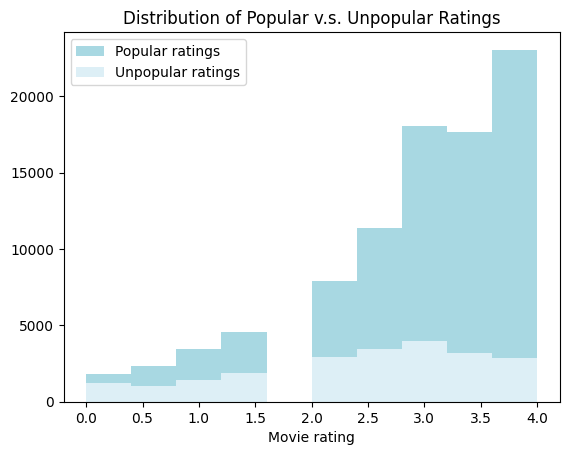

In [4]:
# check the distribution of two groups
plt.hist(popular, label='Popular ratings',color = "#a8d8e2")
plt.hist(unpopular, label='Unpopular ratings', color = "#ddeff6")
plt.xlabel('Movie rating')
plt.title("Distribution of Popular v.s. Unpopular Ratings")
plt.legend()
plt.show()

In [5]:
# run one sided mannwhitneyu test
u1,p1 = mannwhitneyu(unpopular, popular, alternative = 'less')
u1,p1
print(f"p-value is {p1} < 0.005, we have sufficient evidence to reject the null hypothesis. \nThus, movies that are more popular tend to have higher average mean than movies that are not popular.")

p-value is 0.0 < 0.005, we have sufficient evidence to reject the null hypothesis. 
Thus, movies that are more popular tend to have higher average mean than movies that are not popular.


**Prob 2: Are movies that are newer rated differently than movies that are older? [Hint: Do a median split of year of release to contrast movies in terms of whether they are old or new]**

In [6]:
# scrape years of movie in header
lst_year = [int(i[i.find("(")+1:i.find(")")]) for i in list(movie_ratings.columns[:400])]
# find median of year release
np.median(np.array(lst_year))
# split movies into two groups -- older and newer
older=movie_ratings.loc[:,lst_year < np.median(lst_year)].to_numpy()
newer = movie_ratings.loc[:,lst_year >= np.median(lst_year)].to_numpy()
# stack ratings together and drop elementwise
older = older[~np.isnan(older)]
newer = newer[~np.isnan(newer)]

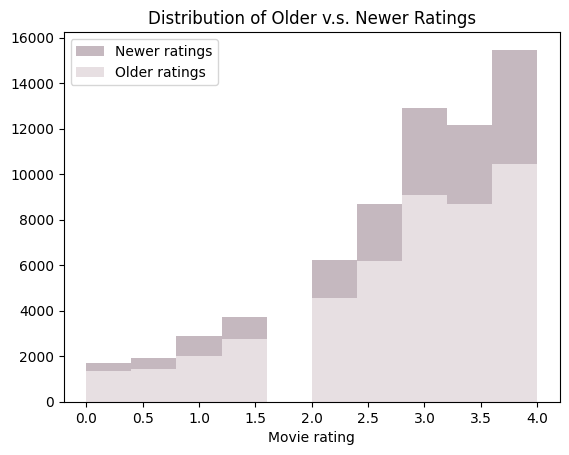

In [7]:
# check distribution of each groups
plt.hist(newer, label='Newer ratings', color = "#c5b8bf")
plt.hist(older, label='Older ratings',color = "#e7dfe2")

plt.xlabel('Movie rating')
plt.title("Distribution of Older v.s. Newer Ratings")
plt.legend()
plt.show()

In [8]:
# run two-sided mannwhitneyu test
t1,p1 = mannwhitneyu(older, newer)
t1,p1
print(f"p-value is {p1} < 0.005, we have sufficient evidence to reject the null hypothesis. \nThus, movies that are more older do not tend to have same median as movies that are newer.")

p-value is 1.2849216001533932e-06 < 0.005, we have sufficient evidence to reject the null hypothesis. 
Thus, movies that are more older do not tend to have same median as movies that are newer.


**Prob 3: Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?**

In [9]:
# split shrek ratings by gender, drop na elementwise
female_shrek = df[df['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 1]['Shrek (2001)'].dropna().to_numpy()
male_shrek = df[df['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 2]['Shrek (2001)'].dropna().to_numpy()

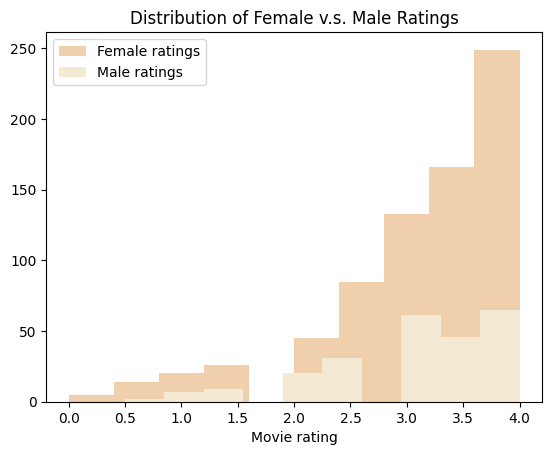

In [10]:
# check distribution for two groups
plt.hist(female_shrek, label='Female ratings', color = "#efcfac")
plt.hist(male_shrek, label='Male ratings',color = "#f4ead3")
plt.xlabel('Movie rating')
plt.title('Distribution of Female v.s. Male Ratings')
plt.legend()
plt.show()

In [11]:
# run kstest
p = stats.kstest(female_shrek, male_shrek)
print(f"p-value is {p[1]} > 0.005, we do not have sufficient evidence to reject the null hypothesis. \nThus, movie ratings that are from men tend to have same distribution as women.")

p-value is 0.05608204072286342 > 0.005, we do not have sufficient evidence to reject the null hypothesis. 
Thus, movie ratings that are from men tend to have same distribution as women.


In [12]:
# run Mannwhitneyu
t1,p1 = mannwhitneyu(female_shrek, male_shrek)
t1,p1
print(f"p-value is {p1} > 0.005, we do not have sufficient evidence to reject the null hypothesis. \nThus, movie ratings that are from men tend to have same distribution as women.")

p-value is 0.050536625925559006 > 0.005, we do not have sufficient evidence to reject the null hypothesis. 
Thus, movie ratings that are from men tend to have same distribution as women.


**Prob 4: What proportion of movies are rated differently by male and female viewers?**

In [13]:
# split movie ratings by gender
female = df[df['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 1].iloc[:,:400].to_numpy()
male = df[df['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 2].iloc[:,:400].to_numpy()

In [14]:
# loop through each movie, run kstest and find proportion of significant tests
different_count = 0
for i in range(len(female[0])):
  # drop na elementwise
  test_female = female[:,i]
  test_female = test_female[~np.isnan(test_female)]
  test_male = male[:,i]
  test_male = test_male[~np.isnan(test_male)]
  if (stats.kstest(test_male, test_female)[1] < 0.005):
    different_count += 1
print("the number of different ratings: ",different_count)
print("proportion:", different_count/len(female[0]))

the number of different ratings:  25
proportion: 0.0625


In [15]:
# loop through each movie, run mannwhitneyu test and find proportion of significant tests
different_count = 0
for i in range(len(female[0])):
  # drop na elementwise
  test_female = female[:,i]
  test_female = test_female[~np.isnan(test_female)]
  test_male = male[:,i]
  test_male = test_male[~np.isnan(test_male)]
  if (stats.mannwhitneyu(test_male, test_female)[1] < 0.005):
    different_count += 1
print("the number of different ratings: ",different_count)
print("proportion:", different_count/len(female[0]))

the number of different ratings:  50
proportion: 0.125


**Prob 5: Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?**

In [16]:
# split The Lion King ratings into two groups, drop nan elementwise
only_child = df[df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 1]['The Lion King (1994)'].dropna().to_numpy()
siblings = df[df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 0]['The Lion King (1994)'].dropna().to_numpy()

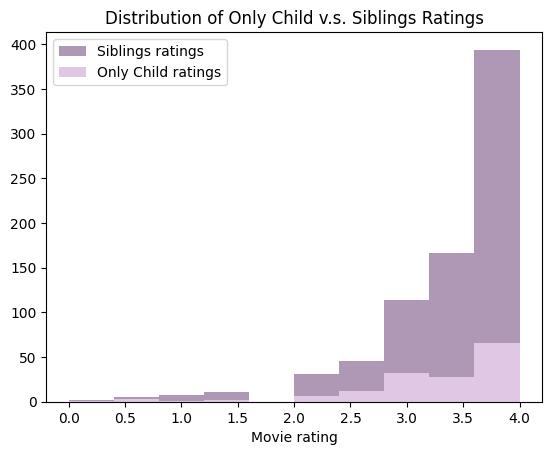

In [17]:
# check distribution
plt.hist(siblings, label='Siblings ratings', color = "#ae98b6")
plt.hist(only_child, label='Only Child ratings', color = "#e0c7e3")

plt.xlabel('Movie rating')
plt.title('Distribution of Only Child v.s. Siblings Ratings')
plt.legend()
plt.show()
# ax1 = plt.subplot(221)
# ax2 = plt.subplot(222)
# ax1.hist(only_child,color = 'orange')
# ax1.set_xlabel('Movie ratings')
# ax1.set_ylabel('Number of ratings')
# ax1.set_title('Only child ratings')
# ax2.hist(siblings, color = 'b')
# ax2.set_xlabel('Movie ratings')
# ax2.set_ylabel('Number of ratings')
# ax2.set_title('Siblings ratings')
# plt.show()

In [18]:
# run one sided mannwhitneyu test
statistic, p_value = mannwhitneyu(only_child, siblings, alternative='greater')
print(f"p-value is {p_value} > 0.005, we do not have sufficient evidence to reject the null hypothesis. \nThus, movie ratings that are from only children tend to have same median as people with siblings.")

p-value is 0.978419092554931 > 0.005, we do not have sufficient evidence to reject the null hypothesis. 
Thus, movie ratings that are from only children tend to have same median as people with siblings.


In [19]:
# We tried bootstrap sample mean differences and do kstest
# def bootstrap(x,y):
#   # Number of bootstrap samples
#   num_samples = 100

#   # Initialize arrays to store bootstrapped statistics
#   bootstrapped_means = np.zeros(num_samples)

#   for i in range(num_samples):
#       # Resample with replacement from the original data
#       alone_bootstrap_sample = np.random.choice(x, len(x), replace=True)
#       social_bootstrap_sample = np.random.choice(y, len(y), replace=True)

#       # Calculate the mean for each resampled group
#       bootstrapped_means[i] = np.mean(social_bootstrap_sample) - np.mean(alone_bootstrap_sample)
#   return bootstrapped_means
# p = stats.kstest(only_child, siblings)
# bootstrapped_means = bootstrap(only_child, siblings)
# t_statistic, p_value = stats.ttest_1samp(bootstrapped_means, 0)
# t_statistic, p_value = stats.ttest_ind(only_child, siblings)

**Prob 6: What proportion of movies exhibit an “only child effect”, i.e. are rated different by viewers with siblings vs. those without?**

In [20]:
# split ratings into two groups
only_child = df[df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 1].iloc[:,:400].to_numpy()
siblings = df[df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 0].iloc[:,:400].to_numpy()

In [21]:
# loop through each movie, drop na elementwise, run *two sided* mannwhitneyu test for each movie, find proportion of signigicant test.
different_count = 0
for i in range(len(only_child[0])):
  test_only_child = only_child[:,i]
  test_only_child = test_only_child[~np.isnan(test_only_child)]
  test_siblings = siblings[:,i]
  test_siblings = test_siblings[~np.isnan(test_siblings)]
  # if (stats.kstest(test_only_child, test_siblings)[1] < 0.005):
  #   different_count += 1
  statistic, p_value = mannwhitneyu(test_only_child, test_siblings)
  if p_value < 0.005:
    different_count += 1
different_count/len(only_child[0])

0.0175

**Prob 7: Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone?**

In [22]:
# split movies into two groups and drop na element wise
alone = df[df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 1]['The Wolf of Wall Street (2013)'].dropna().to_numpy()
social = df[df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 0]['The Wolf of Wall Street (2013)'].dropna().to_numpy()

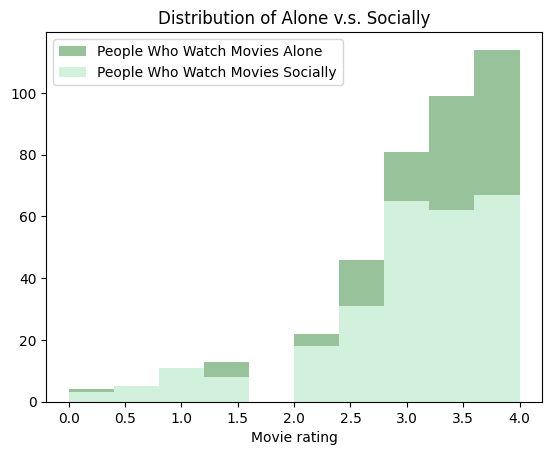

In [23]:
# check distribution
plt.hist(alone, label='People Who Watch Movies Alone', color = "#98c39a")
plt.hist(social, label='People Who Watch Movies Socially', color = "#d2f1dc")

plt.xlabel('Movie rating')
plt.title('Distribution of Alone v.s. Socially')
plt.legend()
plt.show()
# plt.hist(alone)
# plt.title('people who watch movies alone')
# plt.xlabel('movie ratings')
# plt.show()
# plt.hist(social)
# plt.title('people who watch movies socially')
# plt.xlabel('movie ratings')
# plt.show()

In [24]:
# do one-sided mannwhitneyu test
statistic, p_value = mannwhitneyu(alone, social, alternative = 'less')
print(p_value)

0.9436657996253056


In [25]:
# we tried other ways: 1. bootstrap mean differencen and do t-test 2.independent t-test 3. chi2
#  def bootstrap(x,y):
#   # Number of bootstrap samples
#   num_samples = 100

#   # Initialize arrays to store bootstrapped statistics
#   bootstrapped_means = np.zeros(num_samples)

#   for i in range(num_samples):
#       # Resample with replacement from the original data
#       alone_bootstrap_sample = np.random.choice(x, len(x), replace=True)
#       social_bootstrap_sample = np.random.choice(y, len(y), replace=True)

#       # Calculate the mean for each resampled group
#       bootstrapped_means[i] = np.mean(social_bootstrap_sample) - np.mean(alone_bootstrap_sample)
#   return bootstrapped_means
# t_statistic, p_value = stats.ttest_1samp(bootstrapped_means, 0)
# print(p_value/2)
# t_statistic, p_value = stats.ttest_ind(alone, social)
# print(p_value/2)
# chi2
# alone_counts = df[df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 1]['The Wolf of Wall Street (2013)'].dropna().value_counts().sort_index(ascending=False)
# social_counts = df[df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 0]['The Wolf of Wall Street (2013)'].dropna().value_counts().sort_index(ascending=False)
# chi2_contingency(np.array([alone_counts, social_counts]))

**Prob 8: What proportion of movies exhibit such a “social watching” effect?**

In [26]:
# split data into two groups
alone = df[df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 1].iloc[:,:400].to_numpy()
social = df[df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 0].iloc[:,:400].to_numpy()

In [27]:
# loop through each movie, drop nan elementwise, do one sided mannwhitneyu test, cound proportion of significant test
different_count = 0
for i in range(len(alone[0])):
  test_alone = alone[:,i]
  test_alone = test_alone[~np.isnan(test_alone)]
  test_social = social[:,i]
  test_social = test_social[~np.isnan(test_social)]
  # if (stats.kstest(test_social, test_alone)[1] < 0.005):
  #   different_count += 1
  # bootstrapped_means = bootstrap(test_social,test_alone)
  # t_statistic, p_value = stats.ttest_1samp(bootstrapped_means, 0)
  # t_statistic, p_value = stats.ttest_ind(test_alone, test_social)
  statistic, p_value = mannwhitneyu(test_alone, test_social,alternative = 'less')
  if p_value < 0.005:
    different_count += 1
different_count/len(alone[0])

0.015

In [28]:
# Also tried: loop through each movie, drop nan elementwise, do kstest, cound proportion of significant test
# different_count = 0
# for i in range(len(alone[0])):
#   test_alone = alone[:,i]
#   test_alone = test_alone[~np.isnan(test_alone)]
#   test_social = social[:,i]
#   test_social = test_social[~np.isnan(test_social)]
#   if (stats.kstest(test_social, test_alone)[1] < 0.005):
#     different_count += 1
# different_count/len(alone[0])

**Prob 9: Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’?**

In [29]:
# get ratings from home alone and finding nemo
home_alone = df['Home Alone (1990)']
finding_nemo = df['Finding Nemo (2003)']

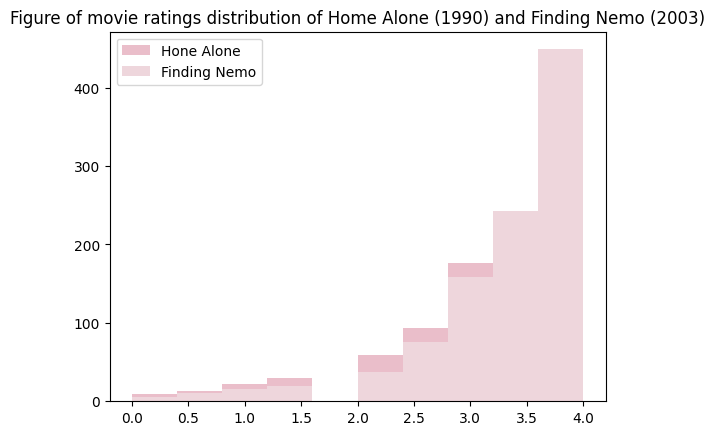

In [30]:
# check distribution
plt.hist(home_alone, label='Hone Alone', color = "#eabeca")
plt.hist(finding_nemo, label = 'Finding Nemo',color = "#eed6dc")
plt.legend()
plt.title("Figure of movie ratings distribution of Home Alone (1990) and Finding Nemo (2003)")
plt.show()


In [31]:
# fig = plt.figure(figsize =(7, 5))
# ax = fig.add_subplot(111)
# data = [home_alone.dropna(), finding_nemo.dropna()]
# yticklables = ['Hone Alone', 'Finding Nemo']
# ax.set_yticklabels(yticklables)
# plot = plt.boxplot(data,vert = 0,patch_artist=True)
# colors = ["#FADEE4", "#A0DDE0"]
# for patch, color in zip(plot['boxes'], colors):
#     patch.set_facecolor(color)
# plt.xlabel('Movie rating')
# plt.title("Figure of movie ratings distribution of Home Alone (1990) and Finding Nemo (2003)")
# plt.show()

In [32]:
# run kstest
p = stats.kstest(home_alone, finding_nemo)
print(f"p-value is {p[1]} < 0.005, we have sufficient evidence to reject the null hypothesis. \nThus, movie rating distribution that is from 'Home Alone' tend to have different distributions as 'Finding Nemo'.")

p-value is 3.2626485864491195e-10 < 0.005, we have sufficient evidence to reject the null hypothesis. 
Thus, movie rating distribution that is from 'Home Alone' tend to have different distributions as 'Finding Nemo'.


**Prob 10: There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these are of inconsistent quality, as experienced by viewers? [Hint: You can use the keywords in quotation marks featured in this question to identify the movies that are part of each franchise]**

In [33]:
# find movies belong to specific franchises, create a dictionary.
franchises = ['Star Wars', 'Harry Potter','The Matrix','Indiana Jones', 'Jurassic Park', 'Pirates of the Caribbean', 'Toy Story', 'Batman']
franchises_dict = {i:[] for i in franchises}
for i in franchises:
  for j in list(movie_ratings.columns):
    if i in j:
      franchises_dict[i].append(j)

In [34]:
franchises_dict['Harry Potter']

["Harry Potter and the Sorcerer's Stone (2001)",
 'Harry Potter and the Deathly Hallows: Part 2 (2011)',
 'Harry Potter and the Goblet of Fire (2005)',
 'Harry Potter and the Chamber of Secrets (2002)']

<ipython-input-35-641e5252527b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklables)


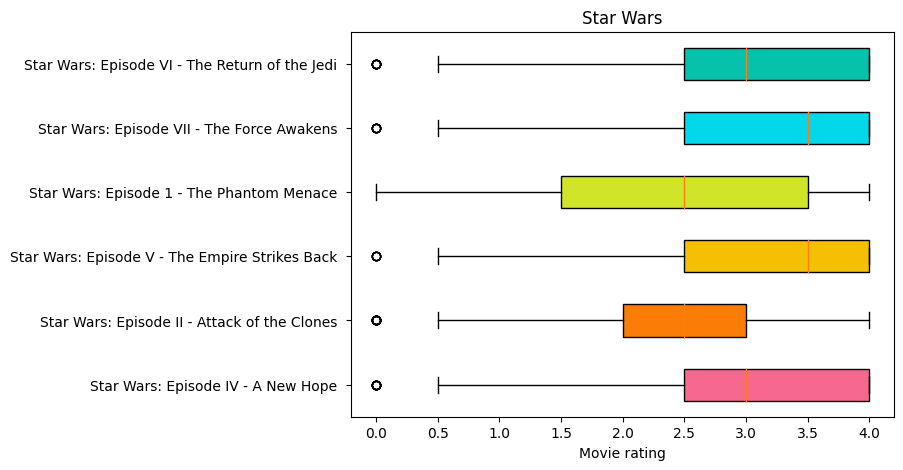

<ipython-input-35-641e5252527b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklables)


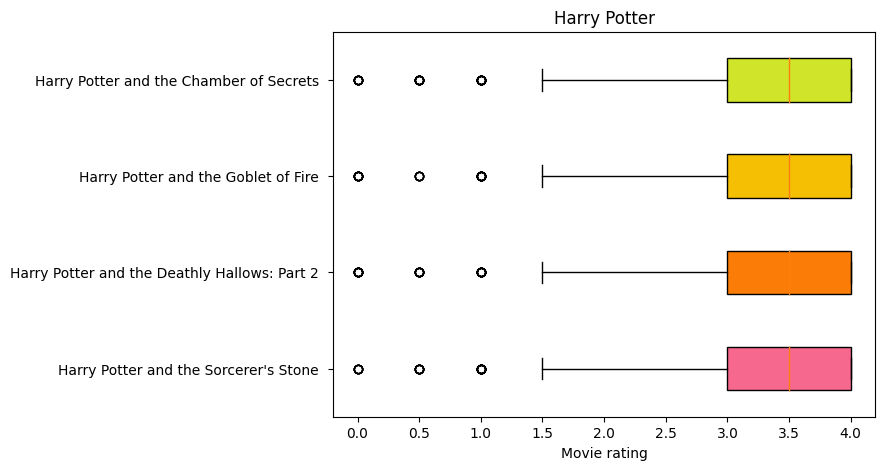

<ipython-input-35-641e5252527b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklables)


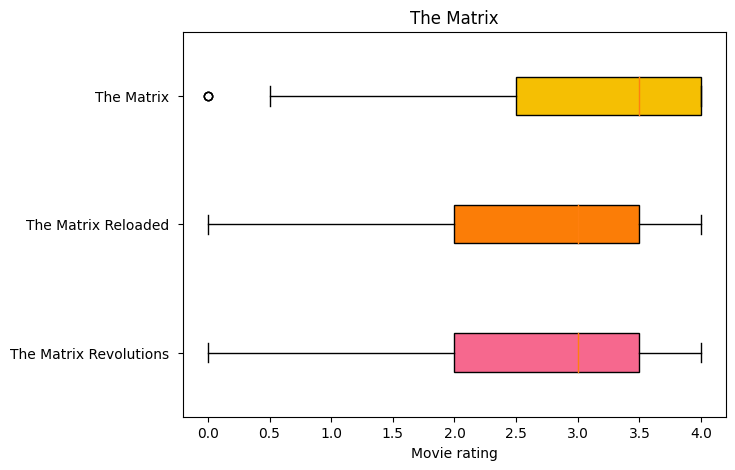

<ipython-input-35-641e5252527b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklables)


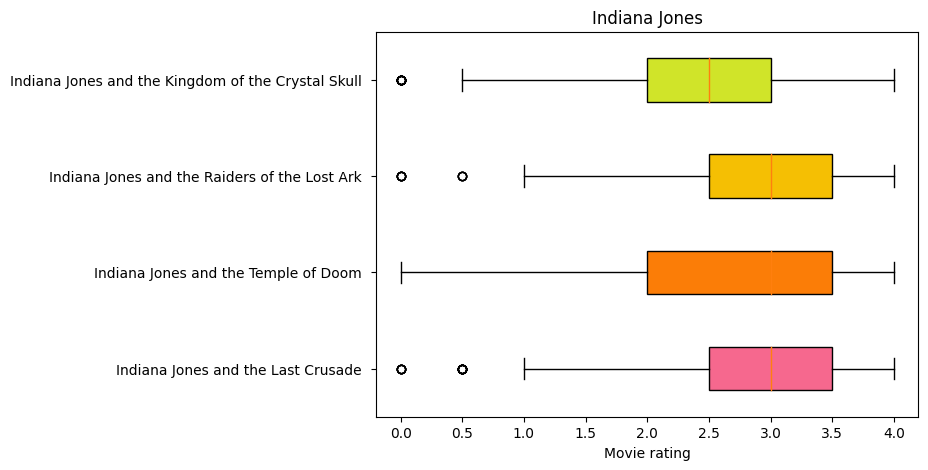

<ipython-input-35-641e5252527b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklables)


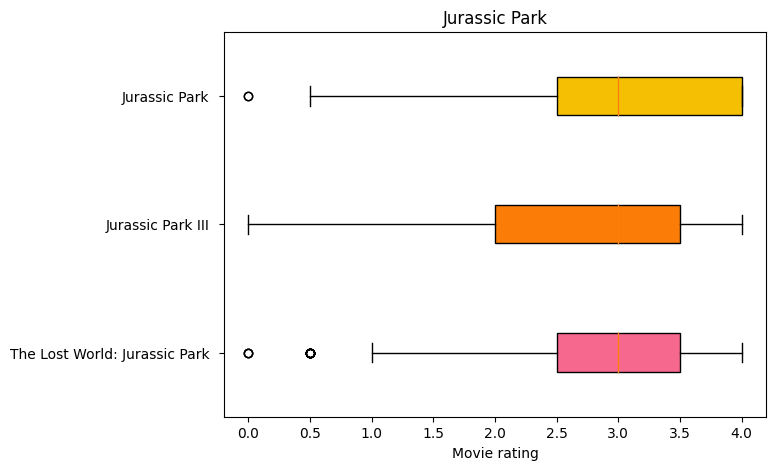

<ipython-input-35-641e5252527b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklables)


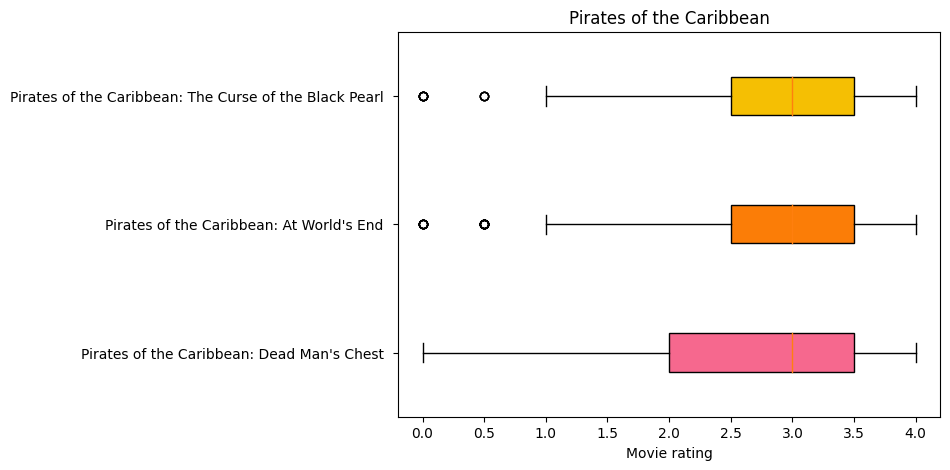

<ipython-input-35-641e5252527b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklables)


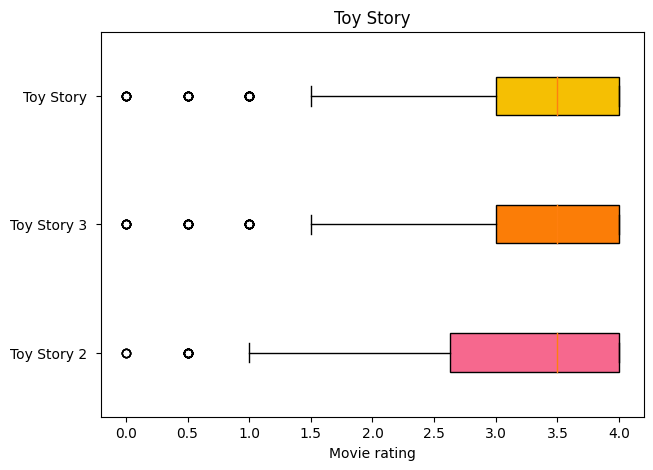

<ipython-input-35-641e5252527b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklables)


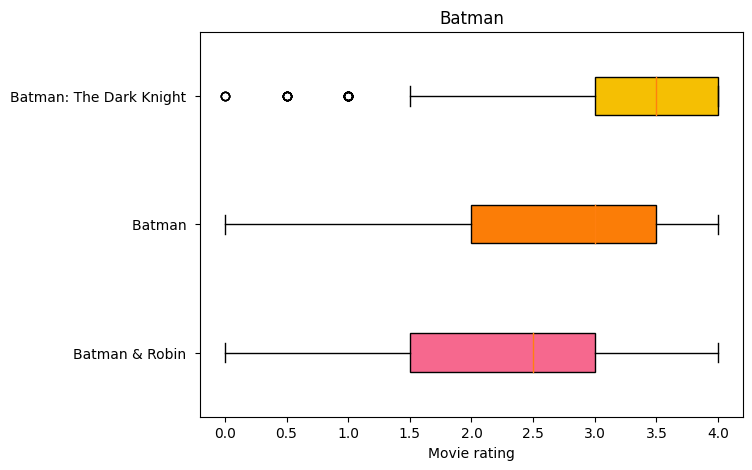

In [35]:
for k,v in franchises_dict.items():
    data = []
    fig = plt.figure(figsize =(7, 5))
    ax = fig.add_subplot(111)
    yticklables = []

    colors = [mcolors.XKCD_COLORS['xkcd:rosy pink'],mcolors.XKCD_COLORS['xkcd:pumpkin orange'],mcolors.XKCD_COLORS['xkcd:golden'], mcolors.XKCD_COLORS['xkcd:sickly yellow'], mcolors.XKCD_COLORS['xkcd:aqua blue'], mcolors.XKCD_COLORS['xkcd:turquoise']]
    for j in v:
        data.append(movie_ratings[j].dropna().to_numpy())
        yticklables.append(j[:-6])
    ax.set_yticklabels(yticklables)
    plot = plt.boxplot(data,vert = 0,patch_artist=True)
    for patch, color in zip(plot['boxes'], colors):
        patch.set_facecolor(color)
    plt.xlabel('Movie rating')
    plt.title(f"{k}")
    plt.show()

In [36]:
# run Kruskal-Wallis H-test for each franchise
results = []
for k,v in franchises_dict.items():
  samples = []
  for i in v:
    samples.append(list(movie_ratings[i].dropna()))
  stat, p_value = stats.kruskal(*[samples[i] for i in range(len(v))])
  results.append({'Franchise':k, 'Test_statistics': stat, 'P-Value': p_value})
results_df = pd.DataFrame(results)
results_df

,Franchise,Test_statistics,P-Value
0,Star Wars,230.584175,8.016477e-48
1,Harry Potter,3.331231,3.433195e-01
2,The Matrix,48.378867,3.123652e-11
3,Indiana Jones,45.794163,6.272776e-10
4,Jurassic Park,46.590881,7.636930e-11
5,Pirates of the Caribbean,20.643998,3.290129e-05
6,Toy Story,24.385995,5.065805e-06
7,Batman,190.534969,4.225297e-42


In [37]:
# sort output table by p-value
table = results_df.sort_values(by = "P-Value", ascending = False)
table['Reject Null Hypothesis?'] = table['P-Value'].apply(lambda x: False if x > 0.005 else True)
table.reset_index().drop(columns = ['index'])

,Franchise,Test_statistics,P-Value,Reject Null Hypothesis?
0,Harry Potter,3.331231,3.433195e-01,False
1,Pirates of the Caribbean,20.643998,3.290129e-05,True
2,Toy Story,24.385995,5.065805e-06,True
3,Indiana Jones,45.794163,6.272776e-10,True
4,Jurassic Park,46.590881,7.636930e-11,True
5,The Matrix,48.378867,3.123652e-11,True
6,Batman,190.534969,4.225297e-42,True
7,Star Wars,230.584175,8.016477e-48,True


In [38]:
# also tried anova
# def bootstrap_1sample (df):
#   num_samples = 1000

#   # Initialize an array to store bootstrap F-statistics
#   bootstrap_f_statistics = np.zeros(num_samples)

#   for i in range(num_samples):
#       # Resample with replacement from the combined data
#       bootstrap_sample = np.random.choice(data, len(data), replace=True)

#       # Split the bootstrap sample into groups
#       bootstrap_group1 = bootstrap_sample[:len(group1)]
#       bootstrap_group2 = bootstrap_sample[len(group1):(len(group1) + len(group2))]
#       bootstrap_group3 = bootstrap_sample[(len(group1) + len(group2)):]

#       # Perform an ANOVA test on the bootstrap sample
#       f_statistic, p_value = stats.f_oneway(bootstrap_group1, bootstrap_group2, bootstrap_group3)

#       # Store the F-statistic in the array
#       bootstrap_f_statistics[i] = f_statistic
# results = []

# for franchise in franchises_dict:
#     df_rating_data = []
#     for movie in franchises_dict[franchise]:
#         ratings = pd.to_numeric(df[movie], errors='coerce').dropna()
#         df_rating_data.append(ratings)
#     f_statistic, p_value = stats.f_oneway(*df_rating_data)
#     results.append({'Franchise': franchise, 'F-Statistic': f_statistic, 'P-Value': p_value})

# results_df = pd.DataFrame(results)
# results_df
# table = results_df.sort_values(by = "P-Value", ascending = False)
# table['Reject Null Hypothesis?'] = table['P-Value'].apply(lambda x: False if x > 0.005 else True)
# table.reset_index().drop(columns = ['index'])
# results_df.loc[results_df['P-Value']<0.005]

**Extra Credit: Tell us something interesting and true (supported by a significance test of some kind) about the movies in this dataset that is not already covered by the questions above [for 5% of the grade score].**

Intuition: For people who "feel the things are happening to them" when watching a movie, they might tend to give higher movie ratings.  
1. From the point of movie, it is possible that movie utilizes technology which made them vividly, so these people might more likely to give higher rating.  
2. From the viewers point, if one is engaged into the movie, he/she must be immersed in the movie and fully asborbed in the story. As a result, their emotion is closely related to the characters and give a higher rating.  

As a result, we propose  
**H0**: For audience who are more likely to feel things on screen are happening to them, their mean movie ratings will be the same as audience who are less liekly to feel things on screen are happening to them.  
**H1**: For audience who are more likely to feel things on screen are happening to them, their mean movie ratings will be higher than audience who are less liekly to feel things on screen are happening to them.

In [39]:
# split into two groups, drop na elementwise
engaged = df[df['When watching a movie I feel like the things on the screen are happening to me'] > 3.0].iloc[:,:400].to_numpy()
not_engaged = df[df['When watching a movie I feel like the things on the screen are happening to me'] < 3.0].iloc[:,:400].to_numpy()
engaged = engaged[~np.isnan(engaged)]
not_engaged = not_engaged[~np.isnan(not_engaged)]

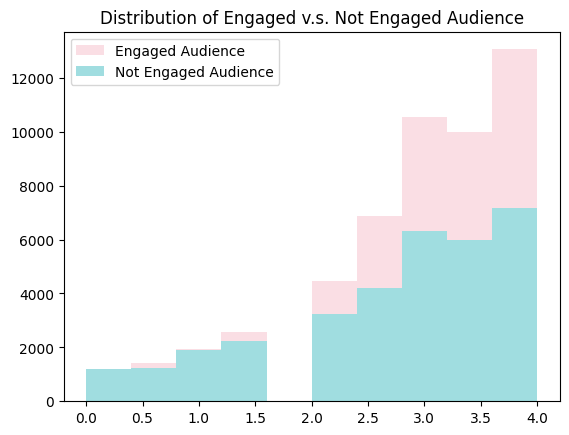

In [40]:
# check distribution
plt.hist(engaged, label='Engaged Audience', color = "#FADEE4")
plt.hist(not_engaged, label = 'Not Engaged Audience',color = "#A0DDE0")
plt.legend()
plt.title("Distribution of Engaged v.s. Not Engaged Audience")
plt.show()


In [41]:
# run one sided mannwhitneyu test
u1,p1 = mannwhitneyu(not_engaged, engaged, alternative = 'less')
u1,p1
print(f"p-value is {p1} < 0.005, we have sufficient evidence to reject the null hypothesis. \nThus, movies that are more popular tend to have higher average mean than movies that are not popular.")

p-value is 1.0822812418045732e-119 < 0.005, we have sufficient evidence to reject the null hypothesis. 
Thus, movies that are more popular tend to have higher average mean than movies that are not popular.


In [42]:
# also tried t-test
# t1,p1 = stats.ttest_ind(engaged_mean, not_engaged_mean)
# print(f"p-value is {p1/2} < 0.005, we have sufficient evidence to reject the null hypothesis. \nThus, the average movie ratings from audience who are more likely to 'feel the things happening on them' tend to have a higher rating on a movie compared to those who less likely to feel so.")